<a href="https://colab.research.google.com/github/hieunguyen-1510/Customer-Shop_Trends/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import thư viện

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Loading data
df = pd.read_csv('/content/shopping_trends.csv')
df.head() # Hiển thị 5 dòng đầu tiên

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


_Customer ID: Mã định danh duy nhất cho mỗi khách hàng

_Age: Tuổi của khách hàng

_Gender: Giới tính của khách hàng (Nam/Nữ)

_Item Purchased: Sản phẩm mà khách hàng đã mua

_Category: Loại sản phẩm đã mua

_Purchase Amount (USD): Số tiền mua hàng bằng USD

_Location: Địa điểm nơi giao dịch được thực hiện

_Size: Kích cỡ của sản phẩm đã mua

_Color: Màu sắc của sản phẩm đã mua

_Season: Mùa mà giao dịch được thực hiện

_Review Rating: Đánh giá của khách hàng cho sản phẩm đã mua

_Subscription Status: Khách hàng có đăng ký (Có/Không)

_Shipping Type: Loại hình vận chuyển mà khách hàng đã chọn

_Discount Applied: Đã áp dụng giảm giá cho giao dịch (Có/Không)

_Promo Code Used: Khách hàng có sử dụng mã khuyến mãi (Có/Không)

_Previous Purchases: Tổng số lần mua hàng trước đó của khách hàng tại cửa hàng, _không tính giao dịch hiện tại

_Payment Method: Phương thức thanh toán ưa thích của khách hàng

_Frequency of Purchases: Tần suất mua hàng của khách hàng (Ví dụ: Hàng tuần, Hai tuần một lần, Hàng tháng)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.shape

(3900, 19)

In [ ]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [ ]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [ ]:
# Kiểm tra giá trị còn thiếu
df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
# Kiểm tra trùng lặp dữ liệu
df.duplicated().sum()

0

In [ ]:
# Kiểm tra số lượng giá trị duy nhất của mỗi cột
df.nunique()

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


In [ ]:
# Kiểm tra thống kê của tập dữ liệu
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
# Bỏ cột ID khách hàng vì nó không quan trọng trong phân tích

df=df.drop(['Customer ID'],axis=1)

In [ ]:
df.Age.describe()

,Age
count,3900.000000
mean,44.068462
std,15.207589
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


Visualization

Gender
Male      2652
Female    1248
Name: count, dtype: int64 



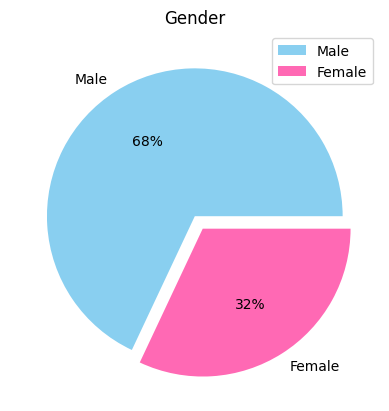

In [ ]:
gender = df.Gender.value_counts()
print(gender,'\n')

plt.pie(gender,labels=gender.index,colors=["#89CFF0", "#FF69B4"],autopct='%.0f%%',explode=(0,0.1))
plt.legend(labels = gender.index, loc = "best")
plt.title('Gender')
plt.show()

Từ biểu đồ, tôi nhận thấy số lượng khách hàng nam nhiều hơn số lượng khách hàng nữ (nhiều hơn gấp đôi).

In [ ]:
df['Item Purchased'].value_counts()

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Sunglasses,161


<ipython-input-203-27d4d6260459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='Item Purchased',palette='cool')


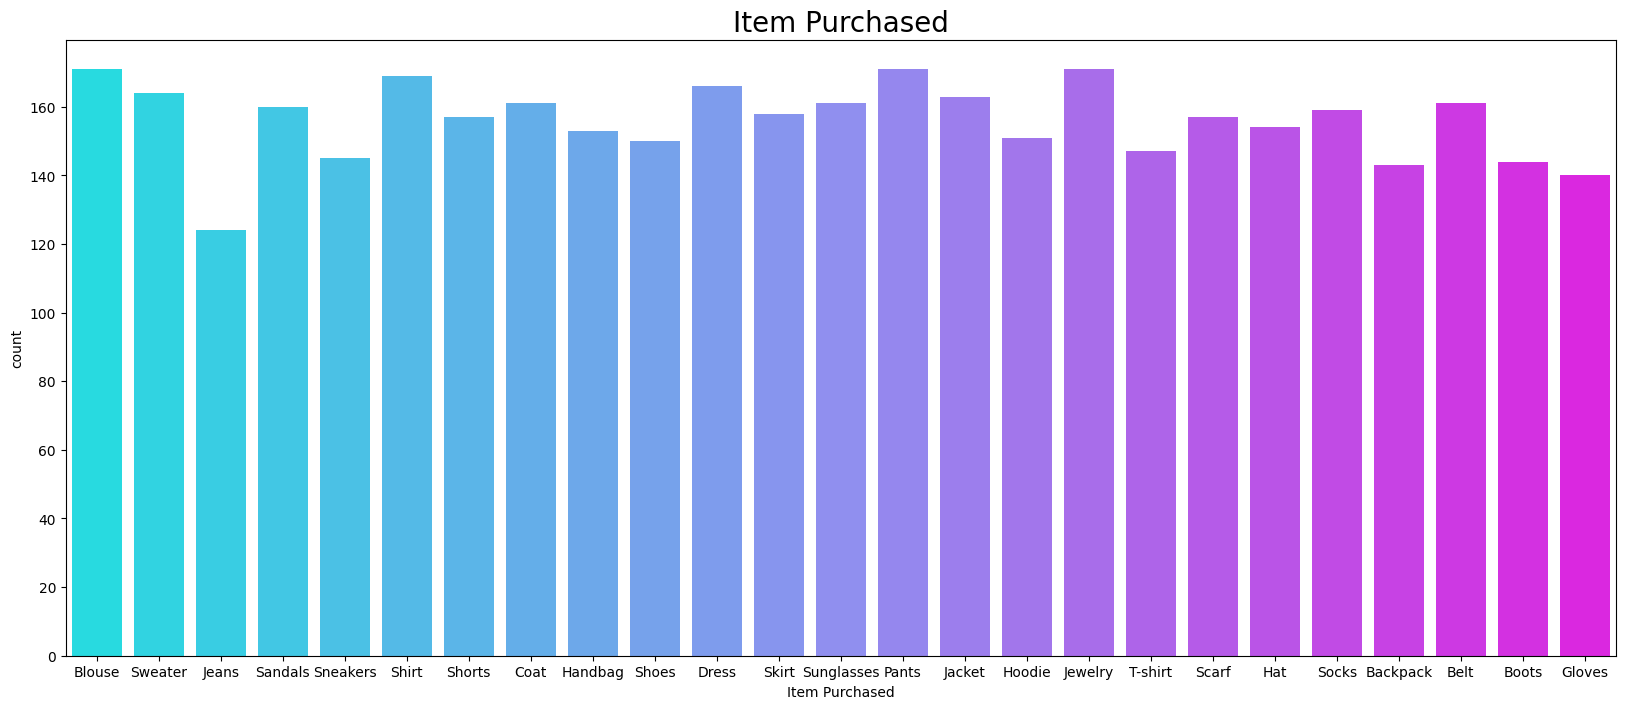

In [ ]:
plt.subplots(figsize=(20,8), dpi=100)
sns.countplot(data= df, x='Item Purchased',palette='cool')
plt.title("Item Purchased",fontsize=20)
plt.show()

Từ biểu đồ , ta thấy mặt hàng được bán nhiều nhất là Áo, Trang sức và Quần.

In [ ]:
Count_Of_Category = df['Category'].value_counts()
Count_Of_Category

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


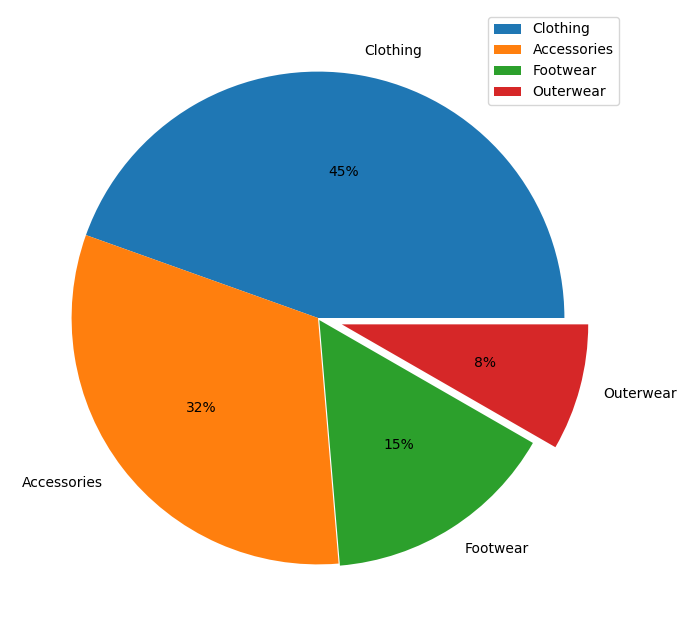

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Count_Of_Category,labels=Count_Of_Category.index,autopct='%0.0f%%',explode=(0,0,0.01,0.1))
plt.legend(Count_Of_Category.index,loc =1)
plt.show()

Hầu hết các loại Danh mục của mặt hàng được mua là Quần áo và Phụ kiện.

In [ ]:
df['Location'].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


<ipython-input-207-df5adfc8d69c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_Location, y=top_10_Location.index,palette='viridis',linewidth = 4)


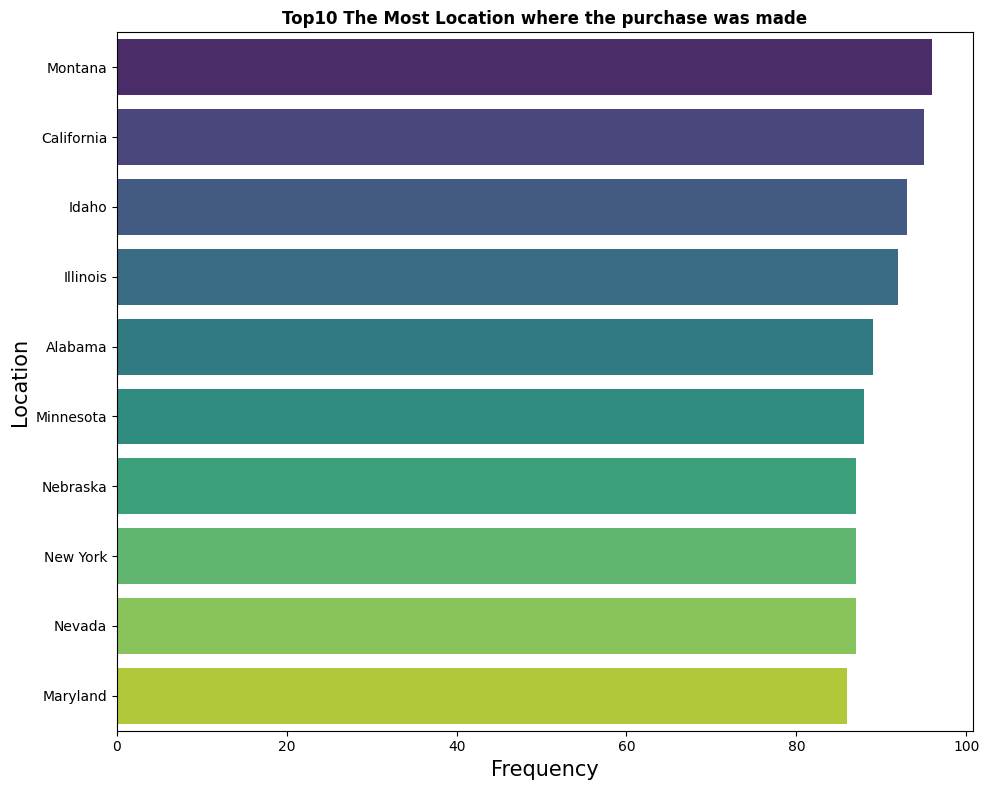

In [ ]:
top_10_Location = df.Location.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_Location, y=top_10_Location.index,palette='viridis',linewidth = 4)
plt.title('Top10 The Most Location where the purchase was made',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Location',fontsize=15)
plt.tight_layout()
plt.show()

Ba thành phố bán chạy nhất là Montana, California và Idaho

In [ ]:
size_count = df['Size'].value_counts()
size_count

,count
Size,
M,1755
L,1053
S,663
XL,429


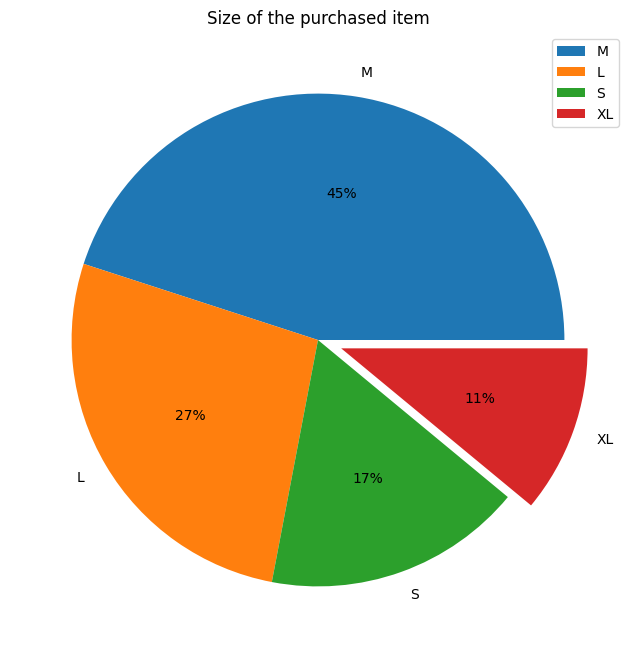

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(size_count,labels=['M','L','S','XL'],autopct='%0.0f%%',explode=(0,0,0,0.1))
plt.legend( ['M','L','S','XL'],loc =1)
plt.title('Size of the purchased item')
plt.show()

Kích thước bán chạy nhất là kích thước trung bình, tiếp theo là kích thước lớn

In [ ]:
df['Color'].value_counts().head(50)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


<ipython-input-211-a6ce782a0fc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Color, y=Color.index,palette='cool',linewidth = 4)


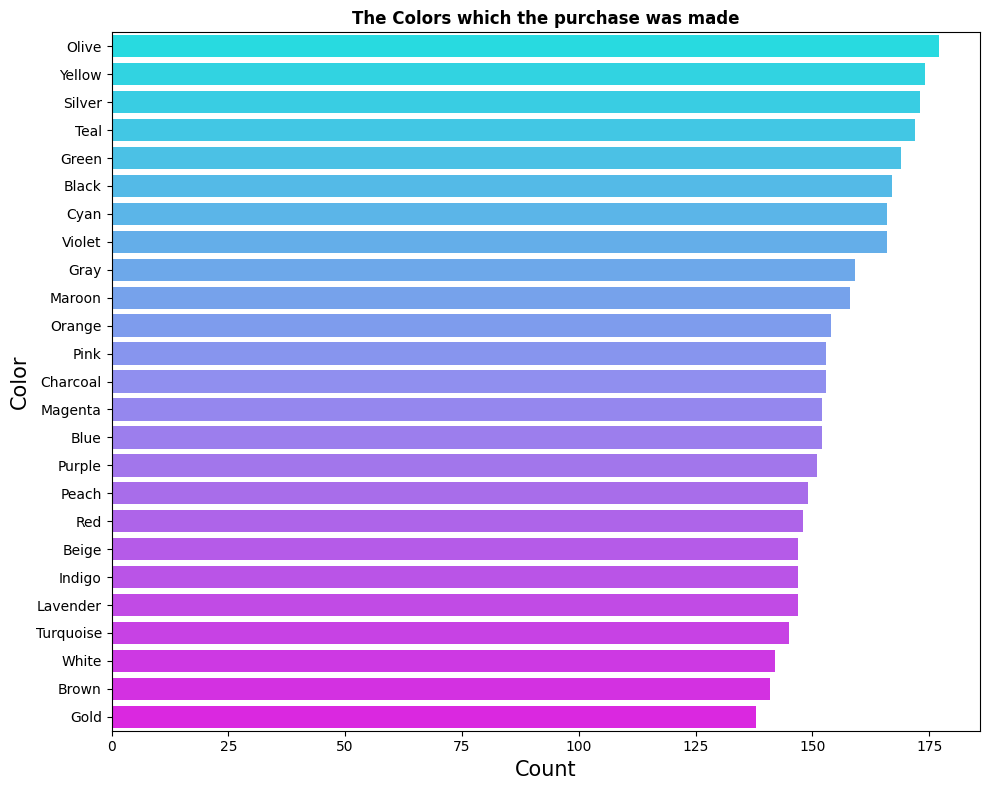

In [ ]:
Color = df['Color'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=Color, y=Color.index,palette='cool',linewidth = 4)
plt.title('The Colors which the purchase was made',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Color',fontsize=15)
plt.tight_layout()
plt.show()

Các màu bán chạy nhất lúc bấy giờ là ô liu, vàng và bạc

In [ ]:
season = df['Season'].value_counts()
season

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [ ]:
df['Review Rating'].describe()

,Review Rating
count,3900.000000
mean,3.749949
std,0.716223
min,2.500000
25%,3.100000
50%,3.700000
75%,4.400000
max,5.000000


Xếp hạng đánh giá tối đa: 5,0__ Xếp hạng đánh giá tối thiểu: 2,5

<Axes: xlabel='Gender', ylabel='Review Rating'>

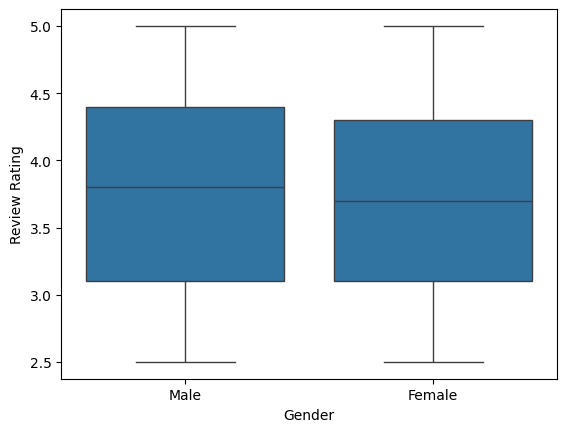

In [ ]:
X=df.groupby('Gender')['Review Rating'].value_counts()
sns.boxplot(x='Gender',y='Review Rating',data=df )

Lượng khách hàng có đăng ký thấp hơn nhiều so với những người không đăng ký

In [ ]:
Shipping_Type = df['Shipping Type'].value_counts()
Shipping_Type

,count
Shipping Type,
Free Shipping,675
Standard,654
Store Pickup,650
Next Day Air,648
Express,646
2-Day Shipping,627


<ipython-input-216-a133ba7eba26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Shipping_Type.index,y=Shipping_Type, palette='viridis',linewidth = 5)


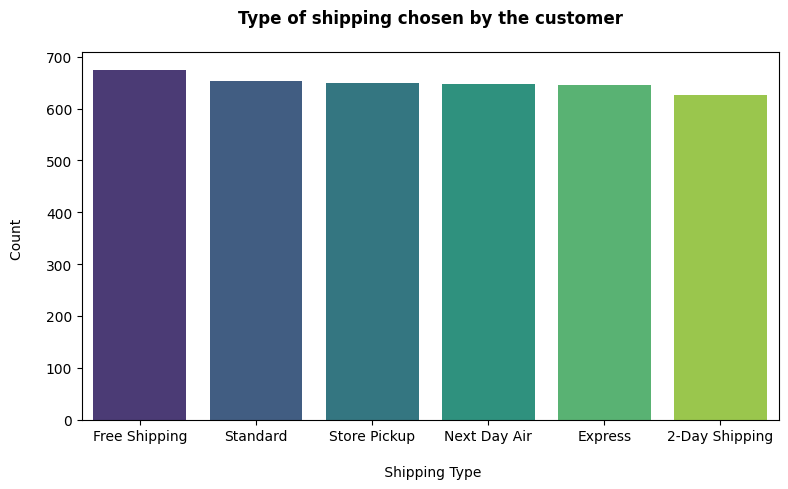

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Shipping_Type.index,y=Shipping_Type, palette='viridis',linewidth = 5)
plt.title('Type of shipping chosen by the customer\n',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('\n Shipping Type',fontsize=10)
plt.ylabel('Count \n',fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
Discount_Applied =df['Discount Applied'].value_counts()
print(Discount_Applied)

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


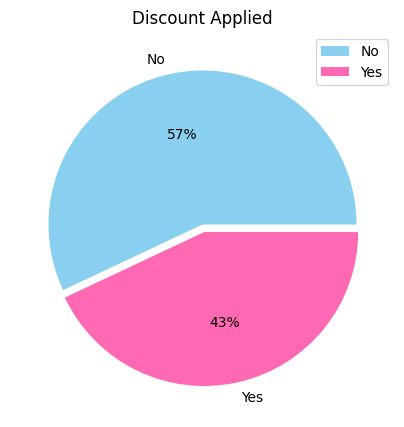

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(Discount_Applied,labels=['No','Yes'],colors=["#89CFF0", "#FF69B4"],autopct='%0.0f%%',explode=(0,0.05))
plt.legend( ['No','Yes'],loc =1)
plt.title('Discount Applied')
plt.show()

Tỷ lệ người được giảm giá gần bằng tỷ lệ người không được giảm giá

In [ ]:
Payment_Method = df['Payment Method'].value_counts()
Payment_Method

,count
Payment Method,
Credit Card,696
Venmo,653
Cash,648
PayPal,638
Debit Card,633
Bank Transfer,632


Phương thức thanh toán phổ biến nhất: PayPal

In [ ]:
pd.crosstab(df['Gender'], df['Category'], values=df['Age'],aggfunc=np.average)

Category,Accessories,Clothing,Footwear,Outerwear
Gender,,,,
Female,44.283163,43.620504,44.482412,44.128713
Male,44.196934,43.859441,44.422500,44.394619


In [ ]:
df.groupby('Gender')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


Tổng số tiền mua cho mỗi giới tính

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

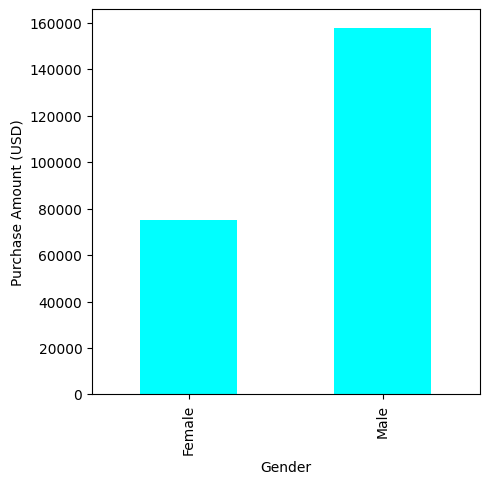

In [ ]:
df.groupby('Gender')['Purchase Amount (USD)'].sum().plot(kind='bar',
figsize=(5,5),colormap='cool',ylabel='Purchase Amount (USD)')

Số lượng mặt hàng được mua từ mỗi danh mục

In [ ]:
df.groupby(['Gender','Category'])['Purchase Amount (USD)'].sum()

Gender  Category   
Female  Accessories    23819
        Clothing       33636
        Footwear       11835
        Outerwear       5901
Male    Accessories    50381
        Clothing       70628
        Footwear       24258
        Outerwear      12623
Name: Purchase Amount (USD), dtype: int64

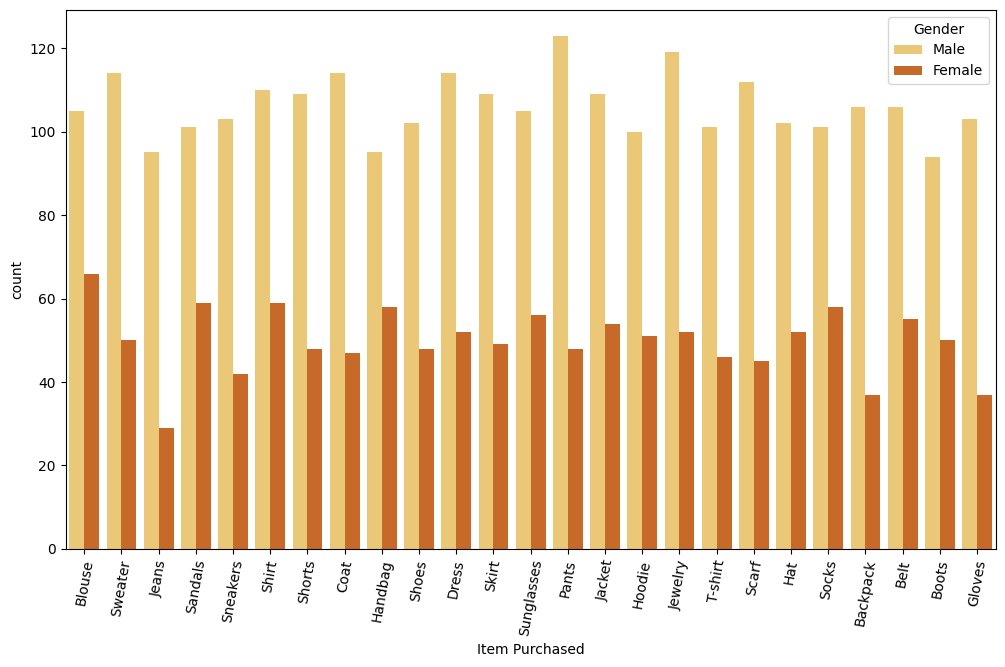

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x='Item Purchased',data=df,hue='Gender',palette='YlOrBr',saturation=.75, width=.8)
plt.xticks(rotation=80)
plt.show()

<Axes: xlabel='Gender,Category', ylabel='Purchase Amount (USD)'>

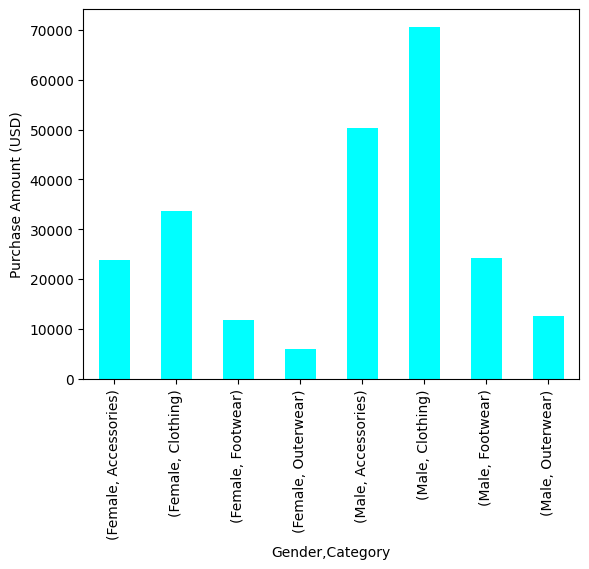

In [ ]:
df.groupby(['Gender','Category'])['Purchase Amount (USD)'].sum().plot(kind='bar',colormap='cool',ylabel='Purchase Amount (USD)')

Để biết tổng số tiền mua cho các mặt hàng được mua từ mỗi danh mục

In [ ]:
pd.crosstab(df['Season'],df['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


<Axes: xlabel='Season', ylabel='Count'>

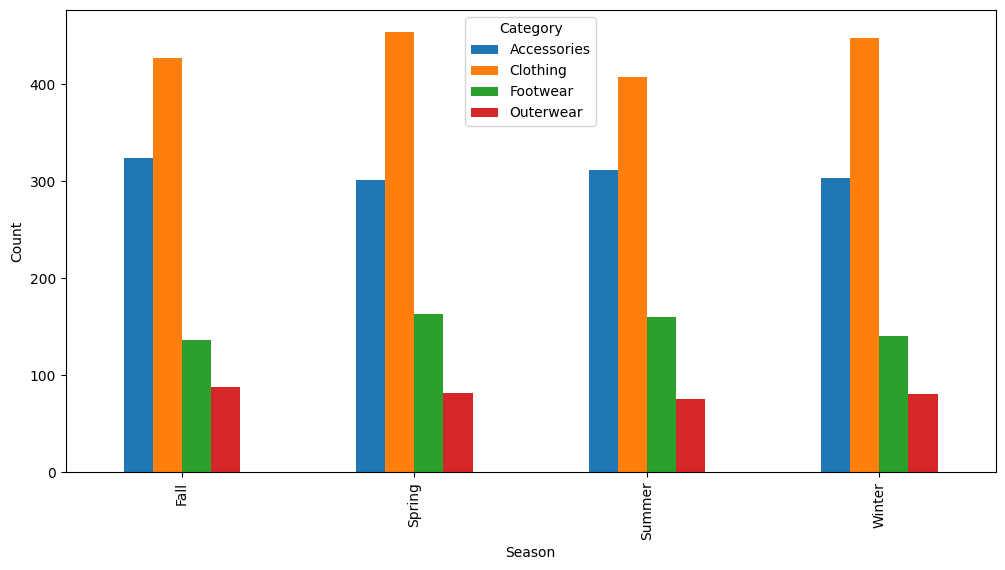

In [ ]:

pd.crosstab(df['Season'],df['Category']).plot(kind='bar',figsize=(12,6),ylabel='Count')

Để biết số lượng Item đã mua trong mỗi mùa

In [ ]:
df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Size,
L,27864
M,47041
S,17416
XL,11943


In [ ]:
pd.crosstab(df['Season'],df['Item Purchased']).T

Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


<Axes: xlabel='Item Purchased', ylabel='Count'>

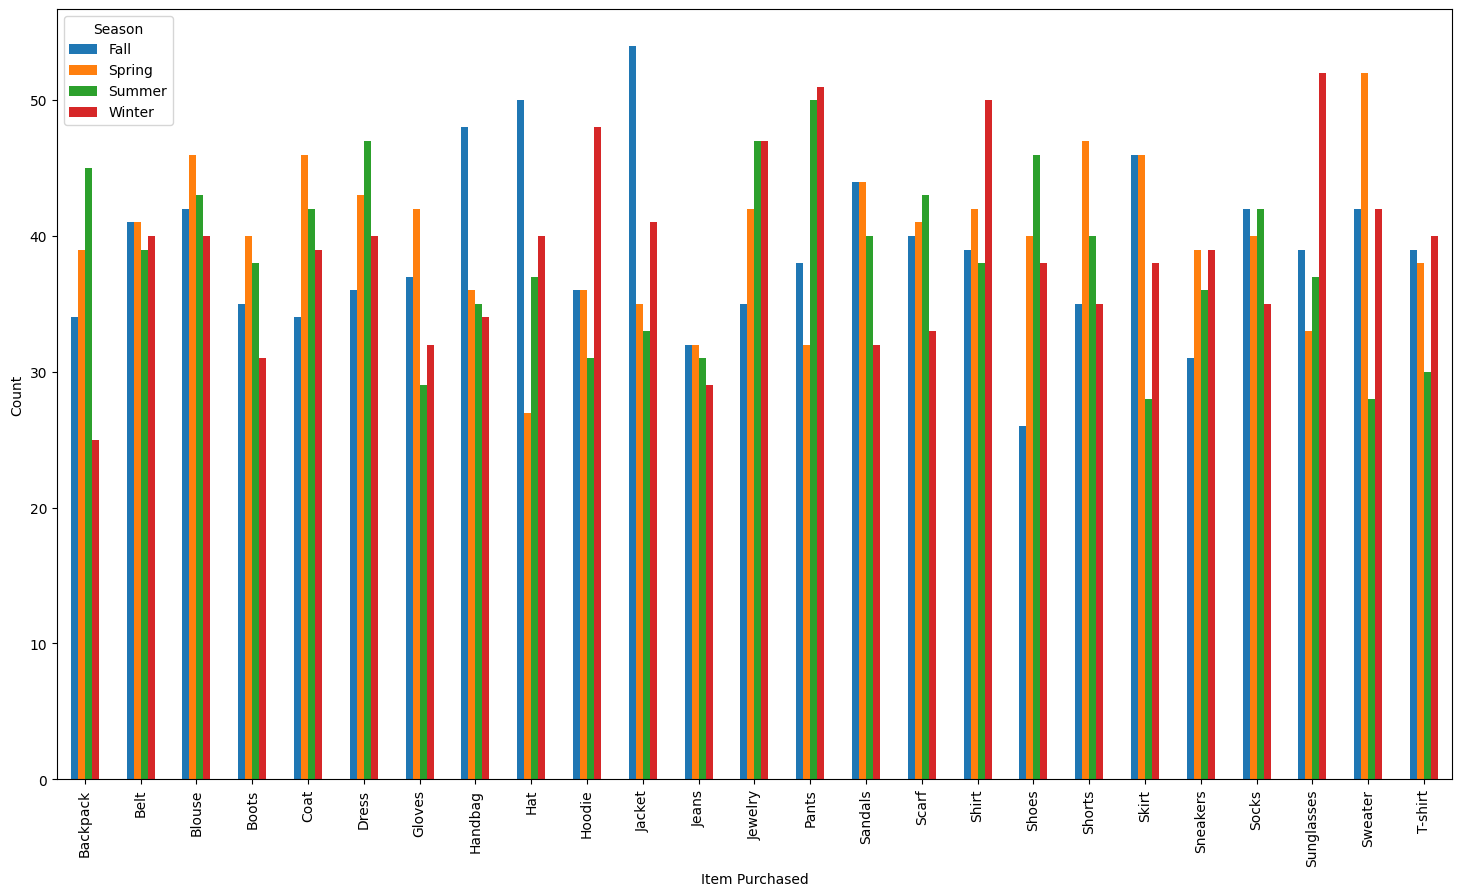

In [ ]:
pd.crosstab(df['Item Purchased'],df['Season']).plot(kind='bar',figsize=(18,10),ylabel='Count')

Để biết Tổng số tiền mua cho các danh mục được mua trong mỗi mùa

In [ ]:
pd.crosstab(df['Season'],df['Category'],values=df['Purchase Amount (USD)'],aggfunc=np.sum)

<ipython-input-231-3619d1bc2d27>:1: FutureWarning: The provided callable <function sum at 0x7eb8212dedd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(df['Season'],df['Category'],values=df['Purchase Amount (USD)'],aggfunc=np.sum)


Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,19874,26220,8665,5259
Spring,17007,27692,9555,4425
Summer,19028,23078,9393,4278
Winter,18291,27274,8480,4562


<ipython-input-232-0d42804b6fd8>:1: FutureWarning: The provided callable <function sum at 0x7eb8212dedd0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(df['Season'],df['Category'],values=df['Purchase Amount (USD)'],aggfunc=np.sum).plot(kind='bar',figsize=(12,6),ylabel='Purchase Amount (USD)')


<Axes: xlabel='Season', ylabel='Purchase Amount (USD)'>

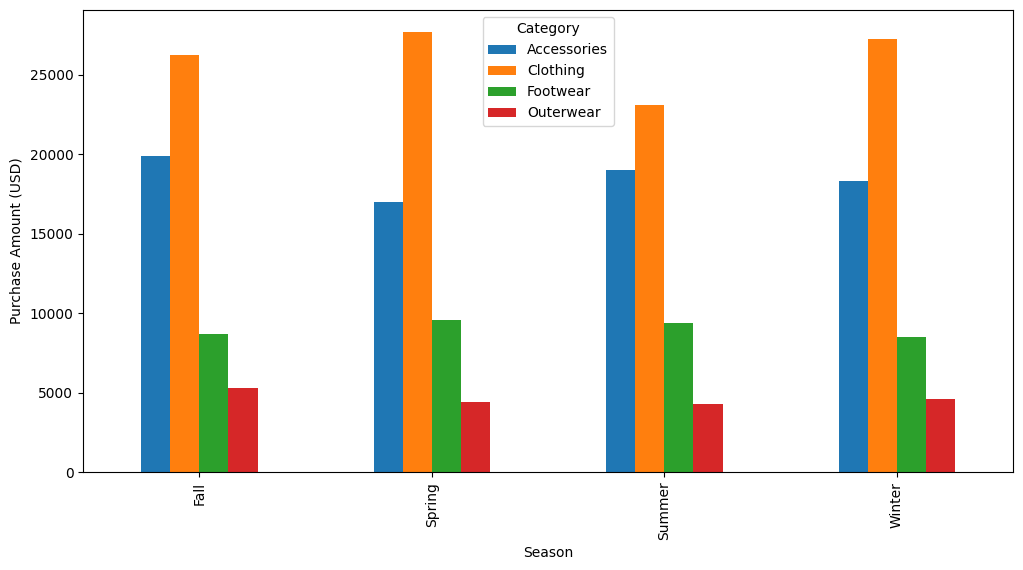

In [ ]:
pd.crosstab(df['Season'],df['Category'],values=df['Purchase Amount (USD)'],aggfunc=np.sum).plot(kind='bar',figsize=(12,6),ylabel='Purchase Amount (USD)')

Chúng tôi nhận thấy rằng số lượng khách hàng nam nhiều hơn rất nhiều so với số lượng khách hàng nữ (hơn gấp đôi).
Những mặt hàng bán chạy nhất là Áo sơ mi, Trang sức, và Quần.
Hầu hết các loại sản phẩm được mua thuộc về Danh mục Quần áo và Phụ kiện.
Số tiền mua trung bình (USD): 60.0
Ba thành phố có doanh thu cao nhất là Montana, California, và Idaho.
Kích cỡ bán chạy nhất là trung bình, theo sau là lớn.
Các màu bán chạy nhất lần lượt là Olive, Vàng và Bạc.
Số lượng khách hàng có đăng ký thấp hơn nhiều so với những khách hàng không đăng ký.
Phương thức thanh toán phổ biến nhất: PayPal.

Phân tích khám phá dữ liệu (EDA)

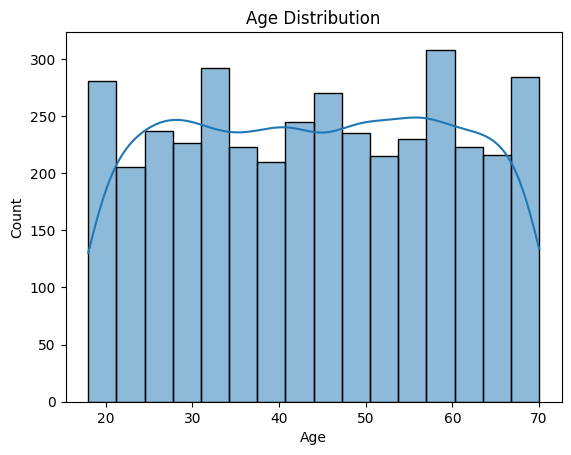

In [ ]:
# Phân phối độ tuổi khách hàng
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


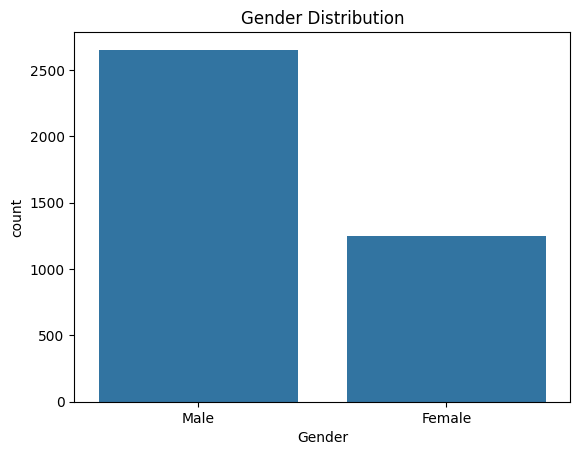

In [ ]:
#Tần suất về giới tính
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()